## Analisando o Dataset Titanic
### Algoritmo árvore de decisão

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
import graphviz

In [2]:
df_train = pd.read_csv('/home/kassia/UFC/ML/train.csv')
df_test = pd.read_csv('/home/kassia/UFC/ML/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = df_train[columns]
y_train = df_train['Survived']
x_test = df_test[columns]
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [5]:
x_train = pd.get_dummies(x_train)
x_train.fillna(0, inplace = True)
x_test = pd.get_dummies(x_test)
x_test.fillna(0, inplace = True)
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


#### Criando a árvore de decisão

In [8]:
modelDT = DecisionTreeClassifier(max_depth=3)
modelDT.fit(x_train, y_train) 
predictions = modelDT.predict(x_test) 

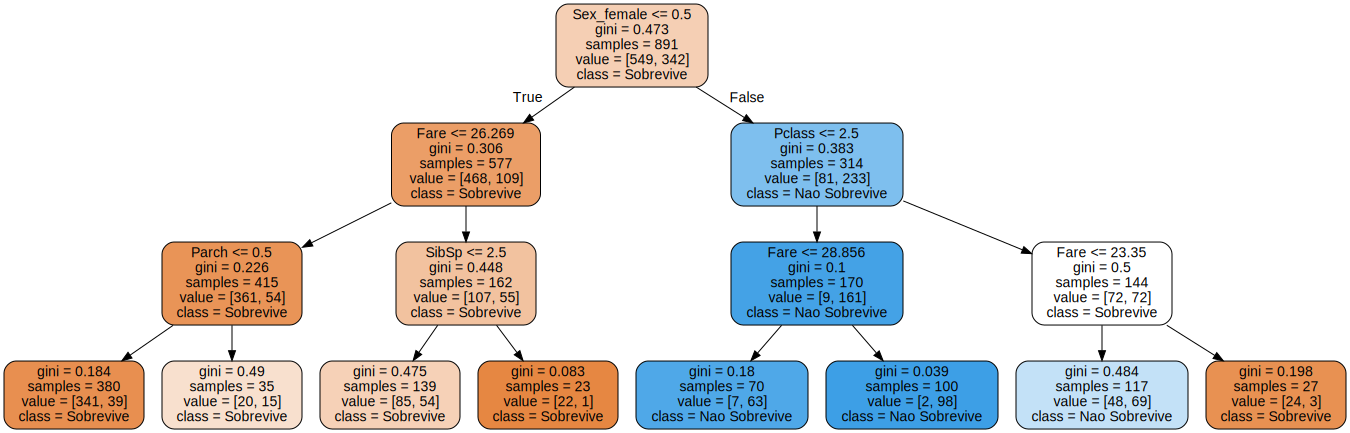

In [9]:
tree.export_graphviz(modelDT, out_file='titanic.dot',
                   feature_names=['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male'], 
                   class_names=['Sobrevive', 'Nao Sobrevive'],
                   label='all',
                   rounded=True,
                   filled=True)
graph = graphviz.Source(open("titanic.dot", "r").read())
graph